In [128]:
import pandas as pd
import seaborn as sns

In [129]:
df = pd.read_csv("salida.csv")
df.head(20)

,f,c,acceso,tiempo
0,500,500,Filas,0.003833
1,500,500,FilasSec,0.004615
2,500,500,Columnas,0.002112
3,500,500,ColumnasSec,0.002164
4,2500,2500,Filas,0.035660
5,2500,2500,FilasSec,0.035282
6,2500,2500,Columnas,0.028298
7,2500,2500,ColumnasSec,0.036465
8,4500,4500,Filas,0.051371
9,4500,4500,FilasSec,0.094883


In [130]:
df_grouped = df.groupby(['f', 'c', 'acceso'])["tiempo"].mean().reset_index()
df_grouped

,f,c,acceso,tiempo
0,500,500,Columnas,0.001143
1,500,500,ColumnasSec,0.001247
2,500,500,Filas,0.001382
3,500,500,FilasSec,0.001933
4,2500,2500,Columnas,0.020007
5,2500,2500,ColumnasSec,0.033348
6,2500,2500,Filas,0.020588
7,2500,2500,FilasSec,0.030620
8,4500,4500,Columnas,0.057331
9,4500,4500,ColumnasSec,0.101015


In [131]:
df_grouped.groupby(["acceso"])["tiempo"].mean()

acceso
Columnas       0.102107
ColumnasSec    0.179941
Filas          0.073403
FilasSec       0.135322
Name: tiempo, dtype: float64

In [132]:
df_grouped.groupby(["acceso"])["tiempo"].std()

acceso
Columnas       0.115430
ColumnasSec    0.203590
Filas          0.074316
FilasSec       0.141293
Name: tiempo, dtype: float64

In [133]:
df_grouped["nroComponentes"] = df_grouped["f"] * df_grouped["c"]

In [134]:
dfColumnas = df_grouped[df_grouped["acceso"].isin(["Columnas", "ColumnasSec"])]
dfFilas = df_grouped[df_grouped["acceso"].isin(["Filas", "FilasSec"])]

<Axes: xlabel='nroComponentes', ylabel='tiempo'>

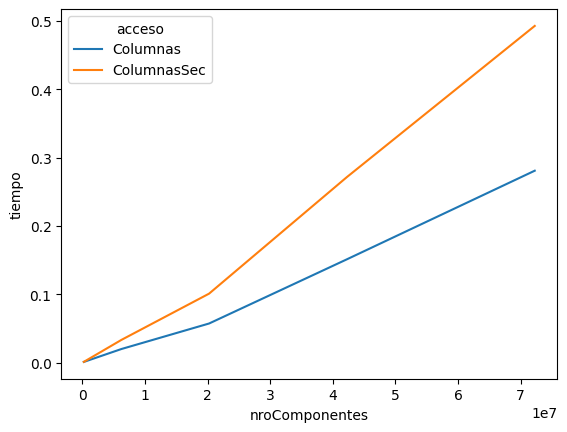

In [135]:
sns.lineplot(dfColumnas, x="nroComponentes", y="tiempo", hue="acceso")

<Axes: xlabel='nroComponentes', ylabel='tiempo'>

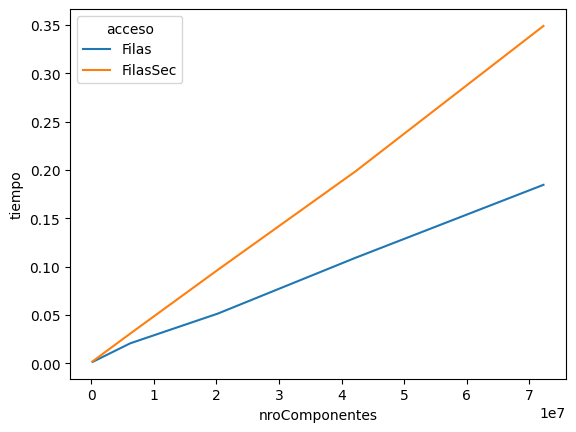

In [136]:
sns.lineplot(dfFilas, x="nroComponentes", y="tiempo", hue="acceso")

In [137]:
valores_a_buscar = ["FilasSec", "ColumnasSec"]
dfSec = df_grouped[df_grouped["acceso"].isin(valores_a_buscar)]
valores_a_buscar = ["Filas", "Columnas"]
dfParalelo = df_grouped[df_grouped["acceso"].isin(valores_a_buscar)]

In [138]:
dfSec

,f,c,acceso,tiempo,nroComponentes
1,500,500,ColumnasSec,0.001247,250000
3,500,500,FilasSec,0.001933,250000
5,2500,2500,ColumnasSec,0.033348,6250000
7,2500,2500,FilasSec,0.030620,6250000
9,4500,4500,ColumnasSec,0.101015,20250000
11,4500,4500,FilasSec,0.096628,20250000
13,6500,6500,ColumnasSec,0.271476,42250000
15,6500,6500,FilasSec,0.198554,42250000
17,8500,8500,ColumnasSec,0.492618,72250000
19,8500,8500,FilasSec,0.348874,72250000


In [139]:
dfParalelo

,f,c,acceso,tiempo,nroComponentes
0,500,500,Columnas,0.001143,250000
2,500,500,Filas,0.001382,250000
4,2500,2500,Columnas,0.020007,6250000
6,2500,2500,Filas,0.020588,6250000
8,4500,4500,Columnas,0.057331,20250000
10,4500,4500,Filas,0.051368,20250000
12,6500,6500,Columnas,0.151210,42250000
14,6500,6500,Filas,0.109127,42250000
16,8500,8500,Columnas,0.280843,72250000
18,8500,8500,Filas,0.184548,72250000


In [140]:
dfSec["acceso"].loc[dfSec["acceso"]=="ColumnasSec"] = "Columnas"
dfSec["acceso"].loc[dfSec["acceso"]=="FilasSec"] = "Filas"
dfSec.drop(["f", "c"], axis=1, inplace=True)
dfParalelo.drop(["f", "c"], axis=1, inplace=True)

/tmp/ipykernel_37935/1849409766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSec["acceso"].loc[dfSec["acceso"]=="ColumnasSec"] = "Columnas"
/tmp/ipykernel_37935/1849409766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSec["acceso"].loc[dfSec["acceso"]=="FilasSec"] = "Filas"
/tmp/ipykernel_37935/1849409766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSec.drop(["f", "c"], axis=1, inplace=True)
/tmp/ipykernel_379

In [141]:
dfMerged = dfSec.merge(dfParalelo, on=["nroComponentes", "acceso"], suffixes=("_sec", "_par"))
dfMerged["speedup"] = dfMerged["tiempo_sec"] / dfMerged["tiempo_par"]

<Axes: xlabel='nroComponentes', ylabel='speedup'>

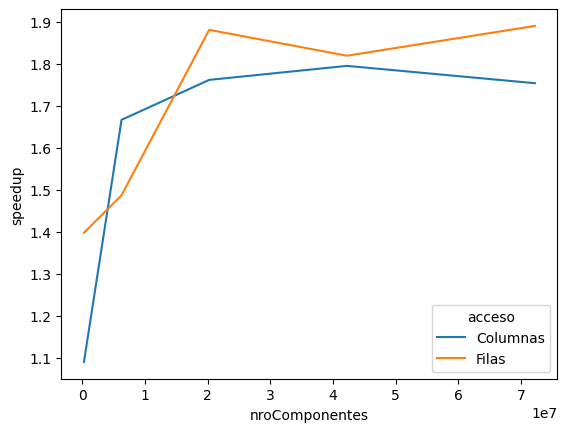

In [142]:
sns.lineplot(dfMerged, x="nroComponentes", y="speedup", hue="acceso")